Univariate Linear Regression
Mean Squared Error: 0.7654104970374587
R^2 Score: 0.692606226089374



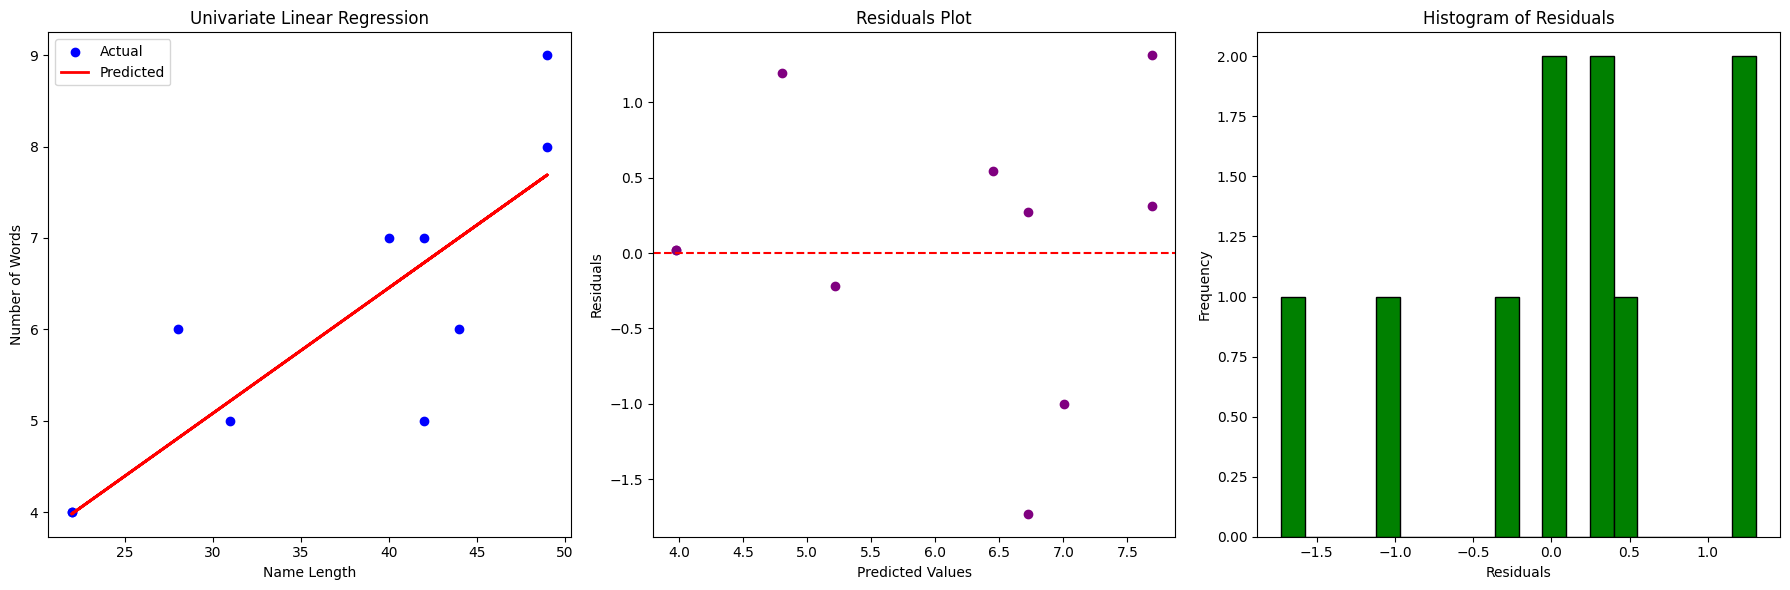

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('./STTs.csv')

# Hypothetical target: Predicting the number of words in a sentence
data['num_words'] = data['name'].apply(lambda x: len(x.split()))

# Univariate feature: Length of the name
data['name_length'] = data['name'].apply(len)

# Features and target variable
X_uni = data[['name_length']]
y = data['num_words']

# Split the dataset
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(X_uni, y, test_size=0.2, random_state=42)

# Train the model
model_uni = LinearRegression()
model_uni.fit(X_train_uni, y_train_uni)

# Predictions
y_pred_uni = model_uni.predict(X_test_uni)

# Evaluation
print("Univariate Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test_uni, y_pred_uni))
print("R^2 Score:", r2_score(y_test_uni, y_pred_uni))
print()

# Plotting
plt.figure(figsize=(18, 6))

# Scatter plot with regression line
plt.subplot(1, 3, 1)
plt.scatter(X_test_uni, y_test_uni, color='blue', label='Actual')
plt.plot(X_test_uni, y_pred_uni, color='red', linewidth=2, label='Predicted')
plt.xlabel('Name Length')
plt.ylabel('Number of Words')
plt.title('Univariate Linear Regression')
plt.legend()

# Residuals plot
plt.subplot(1, 3, 2)
residuals = y_test_uni - y_pred_uni
plt.scatter(y_pred_uni, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

# Histogram of residuals
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=20, color='green', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()
